In [1]:
from getpass import getpass
import pandas as pd
import numpy as np
import seaborn as sns

# Database

## Base dataset
- Kaggle Hits per Decade dataset

In [53]:
df_1960 = pd.read_csv('data/processed/dataset-of-60s.csv')
df_1970 = pd.read_csv('data/processed/dataset-of-70s.csv')
df_1980 = pd.read_csv('data/processed/dataset-of-80s.csv')
df_1990 = pd.read_csv('data/processed/dataset-of-90s.csv')
df_2000 = pd.read_csv('data/processed/dataset-of-00s.csv')
df_2010 = pd.read_csv('data/processed/dataset-of-10s.csv')

In [54]:
# Adding the decade information as a column
df_1960['decade'] = 1960
df_1970['decade'] = 1970
df_1980['decade'] = 1980
df_1990['decade'] = 1990
df_2000['decade'] = 2000
df_2010['decade'] = 2010

In [55]:
# Concatenating all dataframes into one
df = pd.concat([df_1960, df_1970, df_1980, df_1990, df_2000, df_2010], axis=0)

In [56]:
print(df.shape)
df.head()

(41106, 20)


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1960
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1960
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1960
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1960
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1960


In [57]:
# Checking for NaN values: No Missing numbers 
df.isna().sum().sum()

0

In [58]:
# Droping duplicated filtered by both: tracks & artists
df = df.drop_duplicates(subset=['artist','uri'])

In [59]:
# Checking columns
df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [60]:
# inversing columns order: categorical first, and then features

df = df[['track', 'artist', 'uri', 'decade', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']]

In [61]:
# renaming columns to be more 'understandable' 
## -> the target column if the song was in a billboard chart or not)

df.columns = ['track', 'artist', 'uri', 'decade', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'billboard']

In [279]:
df.head()

,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,billboard
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


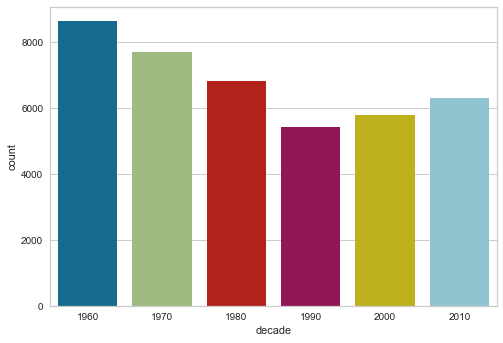

In [146]:
# The dataset seems balanced enough
sns.countplot(df.decade);

In [63]:
# saving this dataset to the 'analysis' directory
df.to_csv('data/analysis/songs_decades.csv', index=False)

## API data collect

Collecting more data to complement the dataset of artists and songs

### Artist dataset

#### Spotify API - additional infos
- `genres`
- `artist_uri`
- `followers`

In [7]:
# Initializing access to spotify's API
access_spotify()

In [8]:
df = pd.read_csv('data/analysis/songs_decades.csv')
df.shape

(40617, 20)

In [9]:
# for each unique value of artist, retrieve stats from spotify (reduced to half):
df_artists = df.drop_duplicates(subset='artist').reset_index(drop=True)
df_artists.shape

(11904, 20)

In [20]:
df_artists_clean_name = clean_name(df_artists, 'artist')

In [21]:
# running spotify api get request for dataset
get_artist_stats(df_artists_clean_name, billboard_col= True)

Garland Green
Serge Gainsbourg
Lord Melody
Celia Cruz
P. Susheela
Ennio Morricone
Antônio Carlos Jobim
Marv Johnson
Caetano Veloso
The Beach Boys
Jerry Goldsmith
Roy Orbison
Luiz Gonzaga
Jimmy Dean
Mary Wells
Leño
Jackie Wilson
Staatskapelle Berlin
Shirley 
The Everly Brothers
Stevie Wonder
Traditional
Scott Walker
Giacomo Puccini
Ernie K-Doe
Bobby Vee
The Beatles
Frank Zappa
Enrique Guzman
Ray Charles
Fritz Kreisler
Jerry Adriani
Gerardo Reyes
Ike 
Joan Manuel Serrat
The Happenings
The Supremes
Tito Rodriguez
Jr. Walker 
Marvin Gaye
Tony Bennett
Mark Van Doren
La Sonora Matancera
Yusef Lateef
The Staple Singers
Maynard Ferguson
Los Teen Tops
Don Hinson 
Nelson Gonçalves
Jim Reeves
Paulinho Nogueira
Charles Aznavour
Victor Jara
Neil Sedaka
David Lindup
Jerry Landis
Johnny Preston
Barbara Mason
Pérez Prado
Ben E. King
Diana Ross 
Betty Everett
Sir Douglas Quintet
Johnny Lytle
The Archies
Bobby Goldsboro
The Exciters
The Marketts
The Box Tops
Guty Cárdenas
Herman's Hermits
Langston Hughe

Dean Martin
Otis Leavill
The Turtles
Ohio Express
Jimmy Gilmer
Horst Jankowski
Lefty Frizzell
The Troggs
The Swinging Blue Jeans
The Artistics
John Williams
Keith Colley
The Vibrations
Isaac Albéniz
The O'Kaysions
Keith Mansfield
Led Zeppelin
Buck Owens
The Gestures
Mal Waldron
Tommy James 
John Barry Orchestra
Deep Purple
Tommy McLain
Millie Small
Gale Garnett
The Rivingtons
The Righteous Brothers
Steve Lawrence
Joe Dassin
The Don Ellis Orchestra
The Majors
Gino Marinuzzi
Don Covay
Oliver Nelson
Francis Lai
B.B. King
The Chambers Brothers
Liverpool Five
Terry Riley
Vikki Carr
Bobby Womack
Trevor Rabin
Ruggero Leoncavallo
Billy Stewart
Buddy Holly
Daniel Santos
Faron Young
P.J. Proby
Etta James
Spirit
Marianne Faithfull
Mercy
Joe Simon
Jumpin' Gene Simmons
The Electric Prunes
Baby Washington
Gene McDaniels
Los Indios Tabajaras
Dickie Goodman
Marcie Blane
Paul Bley Trio
Canhoto
Walter Wanderley
Inez Foxx
King Crimson
Palito Ortega
The Who
Bobby Wood
Dave Brubeck
Lee Konitz
The Temptatio

The Rocky Fellers
The Equals
Serge Reggiani
Tommy Boyce
Duane Eddy and the Rebelettes
Crosby
Michael Hurley
Bill Deal 
Julie Rogers
Mickey Lee Lane
The Sharks
Baden Powell
Darlene Love
Tony Orlando
Spanky 
Ray Barretto
Bill Doggett
The Jewels
The Chanters
Shorty Long
Joey Dee 
The Parliaments
Louis Prima
We Five
Larry Finnegan
The Classics
The Gants
The Fantastic Johnny C
Shelby Flint
Maurice Chevalier
Charley Pride
Savoy Brown
Bill Shirley
Visioneers
The Critters
Benny Spellman
Linda Ronstadt
Gilbert
J.J. Jackson
Galway Kinnell
The Village Stompers
Collay 
The Valentinos
Stefano Torossi
George Gruntz Concert Jazz Band
The Excellents
Peggy Lee
Damita Jo
Kenny O'Dell
James Booker
Enrique Granados
The Shells
Jan Bradley
Phil McLean
Marion Worth
Ace Cannon
H.B. Barnum
Danny Williams
Andrew Hill
Jefferson
Betty Wright
The Devotions
Neal Hefti
Maysa
The Blenders
System Of A Down
Miltiño
Felice Taylor
The Frantics
The Demensions
Fever Tree
Rufus 
The Yellow Balloon
Lucienne Delyle
Hector Ber

Willie Colón
Millie Jackson
Cheryl Barnes
Robert Palmer
Anne Murray
Leo Kottke
Lobo
Walter Egan
Barry Manilow
Big Band Katowice
Brotherhood Of Man
Crystal Gayle
Art Farmer
Jaume Arnella
Robert Fripp
Eloy
Loleatta Holloway
David Gates
Michael Johnson
Walter Murphy 
Chavela Vargas
Claude Debussy
Paul Hindemith
Leon Redbone
Don McLean
Iasos
Rick Springfield
Gene Redding
Nazareth
Dave Maclean
Josep Maria Espinàs
Stealers Wheel
Billy Bond
The Babys
Tonto's Expanding Head Band
Renato Teixeira
Leslie Bricusse
J.D. Short
Melissa Manchester
refreshing token
error: Joe Cocker and The Chris Stainton Band
Tito Schipa Jr.
Brigitte Fontaine
Little Sonny
Olivier Messiaen
Meco
Meat Loaf
Bread
Kas Product
Grover Washington
Harry Chapin
Tycoon
El Chicano
Ecstasy
Five Man Electrical Band
Taeko Onuki
Andrea True Connection
Collin Walcott
Casa Das Máquinas
Hannes Wader
Amado Batista
refreshing token
error: Jane Birkin Serge Gainsbourg
Python Lee Jackson
Stargard
Tanya Tucker
R. Dean Taylor
Toto
Ginger Bake

Paul Butterfield's Better Days
Keola 
John Lennon
Red Eye
Jose Roberto
Giorgio Gaslini
Benny Goodman
Tony Orlando 
Lana Cantrell
Michael Parks
Mac McAnally
Andrew Lloyd Webber
Rick Nelson
Rosa Maria
Los Muecas
Q
Diana Ross 
Roger Daltrey
Moon Martin
Kenny Loggins
Rick James
Ten Years After
Eruption
Brian Protheroe
Nick Gilder
Michael Stearns
Amparo Ochoa
Carol Douglas
Johnnie Taylor
Ashton
Mieczysław Kosz
refreshing token
error: Runt-Todd Rundgren
Good Rockin' Charles
Nick Lowe
Bay City Rollers
Vince Tempera
Aksak Maboul
Ramones
refreshing token
error: Dionne Warwicke 
Rick Derringer
Arthur Verocai
Soul Train Gang
Gary Puckett
Greg Lake
The Soul Children
The Rattles
Champion Jack Dupree
Zbigniew Namysłowski
Grace Jones
Gary Wilson
Gary's Gang
Larry Santos
Hot
Sandro Brugnolini
Diego Verdaguer
Starbuck
Oak
Lamont Dozier
Nitty Gritty Dirt Band
Dawn
Klaus der Geiger
Humble Pie
Michael Henderson
Teddy Pendergrass
Tower Of Power
Tom Petty
Ronnie McDowell
Johnny Williams
The Hollywood Stars


error: John Lennon Plastic Ono Band
The New Hope
Pratt 
Mocedades
Magog
The Glass Bottle
Lena Zavaroni
Lorenzo De Monteclaro
Bob Dylan
McGuinness Flint
Franz Josef Degenhardt
Falsterbo 3
The Jones Girls
Roedelius
Attitudes
Bobby Caldwell
George Duke
Celi Bee 
refreshing token
error: The Brotherhood Of Man
Andrew Jackman
Negative Trend
Sister Janet Mead
Cindy Bullens
Ronnie Spector
Cymande
Cast
Pink Lady
Cherie 
Jean Shepard
New Riders Of The Purple Sage
Dennis Coffey 
Livingston Taylor
Ian Lloyd 
David Blue
Ian Thomas
Larry Norman
Paul Stookey
Loudon Wainwright III
Angela Ro Ro
Emitt Rhodes
Sherbet
Rainbow
Germs
refreshing token
error: Dionne Warwicke
Ian Gomm
Jake Holmes
Clifford Brown
Sea Level
Gino Soccio
Clout
Som Nosso
Lightnin' Slim
Nicola Piovani
Limmie 
Jimmy "Bo" Horne
Musique
The Rubettes
Cherry Vanilla
Karen Young
Petra
Manu Dibango
The Motels
Béla Fleck
The Pogues
John Schneider
Fields Of The Nephilim
Brighton Rock
The Other Ones
Yngwie Malmsteen
The Breakfast Club
Chris 
O

U2
Berlin
Depeche Mode
The Jeff Healey Band
Whodini
Ofer Levi
Freddie Mercury
Manolo Escobar
Graham Kendrick
Harlem World Crew
Newcleus
Aldo Monges
Giuffria
Barricada
Roy Orbison 
David 
Jungle Brothers
Central Line
Supertramp 
Tiffany
Niño Ricardo
Debra Laws
The Waterboys
Lisa Lisa
Agression
Aine Minogue
Metal
Johnny Clegg 
MC Rock Lovely
The Nashville Bluegrass Band
Crash Crew
Dinamita Pa Los Pollos
Christy Moore
Charlelie Couture
Afrika Bambaataa
Jon 
Great White
Peter Fontaine
Kid 'N Play
Bob Carlin
France Gall
Jane's Addiction
Sam Harris
The Action
Pankaj Udhas
Def Con Dos
Robin Lane 
Imagination
Mississippi John Hurt
The New Life Community Choir
Television Personalities
The Legendary Pink Dots
Laibach
John Eddie
Robert Plant
Frida
Will To Power
Barón Rojo
Information Society
refreshing token
error: Kenny Rogers Duet
Baltimora
The Clean
The Frogs
The Glove
West Street Mob
Tangerine Dream
White Lion
Edgar Froese
The Feelies
Hula
Prince
Robert Tepper
The Waitresses
Suave
Eric Johnso

Enuff Z'Nuff
Kalyanji-Anandji
The Replacements
Jimmy Davis 
Sol Invictus
Sepultura
Henry Thomas
Department S
Jean Beauvoir
Orchestral Manoeuvres In The Dark
Lata Mangeshkar
Jair Rodrigues
Neil Young
Jimmy Barnes
Stephanie Mills 
Jason Becker
Mehdi Hassan
Lisa Lisa 
The Sugarcubes
Charlie Dore
Ziggy Marley
Divinyls
Sparks
John Lennon 
Mtume
Ozzy Osbourne
Buckner 
Andy Rojas
Jaco Pastorius
Die Toten Hosen
J. Blackfoot
Sparks 
Joan Armatrading
Kajagoogoo
Front 242
The Kingbees
Jellybean 
Balla Et Ses Balladins
Julio Iglesias
Los Flechazos
Roupa Nova
The Romantics
Rainhard Fendrich
Goanna
Wim Mertens
Robert Ashley
Jennifer Rush
The Plimsouls
Parade Ground
The Kings
Rocky Burnette
David Gilmour
Amazulu
10,000 Maniacs
Miguel Mateos - Zas
Suicidal Tendencies
Korona
Eddie Murphy
Paul Lekakis
Magazine
European Jazz Trio
Lovebug Starski
Lindsey Buckingham
Kissing The Pink
Laid Back
Allan Clarke
Tane Cain
Pretty Boy Floyd
Merle Travis
Glen Campbell 
Udit Narayan
Living Colour
Choirboys
Sherod
Y
J

Clint Black
Rebekah
Chumbawamba
Tennessee Ernie Ford
Ice Cube
BLACKstreet
The Outhere Brothers
La Lupita
Case 
Mr. President
The Get Up Kids
Lisa Keith
Nas 
Mary J. Blige
Mattias IA Eklundh
Enzo Enzo
Elton John 
Ricky Martin
Jagged Edge
Tela 
Brand Nubian
Mack 10
Cookie Monster
Wilson Phillips
Spoon
Sarah McLachlan
R. Kelly 
Little Caesar
Cleopatra
Angelina
The Rembrandts
R. Kelly 
Boyz II Men
The Blues Magoos
David Behrman
Nelson Ned
Atom
Fastball
Jesse Powell
Beenie Man
The Kentucky Colonels
John Rea
Onyx
Spiritualized
Trans-Siberian Orchestra
Bo Nilsson
Spice Girls
The Click
Republica
Hector 
The Kinleys
MeShell Ndegeocello
Liquid Tension Experiment
S.O.A.P.
2Pac 
Kristine W
Morton Feldman
GZA
Art Blakey 
Matt Nathanson
Sven Väth
Del Amitri
Skee-Lo
Even As We Speak
Das EFX
Le Tigre
LeAnn Rimes
KRS-One
BeauSoleil
Yo-Yo Ma
Nicole 
Das EFX
Slovak Philharmonic
A Tribe Called Quest
Alan Munde
Patra
The Goo Goo Dolls
Jan Johansson
Timmy T.
Carl-Henrik Norin
Aphex Twin
La Monte Young
Natal

Chesney Hawkes
Lisa Fischer
Lionel Hampton
Pavilhão 9
The Whites
Crucial Conflict
Weezer
Vrävarna
Brant Bjork
Alípio Martins
Imajin 
Cornelius
Johnny Gill
Fugees
3T
Blind Lemon Jefferson
Lighter Shade Of Brown
The Crüxshadows
Westside Connection
Jane Child
Amanda Marshall
Clarence "Gatemouth" Brown
A
refreshing token
error: The Kenny Wayne Shepherd Band
London Philharmonic Orchestra
Snow
Cathy Dennis
Sabu
Chick Floyd
Too Short 
Ginuwine
Youssou N'Dour
Easley Blackwood
Steve Wariner
Gin Blossoms
Dan Baird
Funkallisto
Random KIlling
Scott Grooves
Los Camisas Negras
Capcom Sound Team
The Notorious B.I.G. 
Playa
Cause 
Notorious
The Osborne Brothers
Mortician
William Clarke
All Out War
Fishmans
Gordon Rees
Luniz
Grapefruit
refreshing token
error: Des'ree
Howard McGhee
Joe Public
Mynediad Am Ddim
Electronic
Los Gibson Boys
Mickey Jupp
Camp Lo
2nu
Ivete Sangalo
Golden Boys
Pierre Henry
Chicos de Barrio
The Third
Jimmy Somerville
Tom Cochrane
Sweetbox
Las manos de Filippi
Mellow Man Ace
Puff 

The Rebel Pebbles
2 Hyped Brothers 
Ken Colyer Skiffle Group
Keiko Matsui
Remedy
José Ribeiro
Rappin' 4-Tay 
Athenaeum
Kenny G
PMD
Artie The 1 Man Party
TQ
Nichole Theriault
refreshing token
error: WC From Westside Connection
Lina Santiago
Béla Fleck and the Flecktones
Thunder
Katalina
Les Enfoirés
Train
Love Sculpture
95 South
Toby Keith
Sawyer Brown
TKA 
Beulah
Joey Kid
Tom Harrell
Salt-N-Pepa 
Alkaline Trio
A.L.T.
SNAP!
Ill Al Skratch 
Channel Live
Chris LeDoux
JD 
Rocking Jojo and his Red Angels
Iced Earth
Debelah Morgan
Rusty
Naughty By Nature 
Ma Rainey
KAI
T.S.O.L.
Kool G Rap
Gonzaguinha
Roland Kirk Quartet
Jonah Jones
Snoop Doggy Dogg
Selena
Latin Fresh
Big Bird
Howard Hewett
Frost
Skavenjah
Cynthia 
Teenage Mutant Ninja Turtles
Andy Montañez
Richard H. Kirk
Gina Thompson
Elias Negash
Fruit De La Passion
Hot Rod Circuit
Yo-Yo 
Michael Angelo Batio
Zeca Baleiro
Geoffrey Williams
Fred Schneider
ピチカート・ファイヴ
The Commitments
Ice Cube 
John Henry Barbee
Snoop Dogg
Dwight Yoakam
Jagged

TTNG
Shakira 
A Touch Of Class
P!nk
Muro
Nelly 
Ludacris
The Lost Trailers
Horse The Band
Lost Horizon
Snoop Dogg 
Jonas Brothers
Cascada
Calle 13
Death Cab For Cutie
MGMT
Cuca
Wisin 
The Casualties
K. J. Yesudas
Anya Marina
Carl Thomas
Akon 
Between The Buried
Goatwhore
Trio Mio
Yellowcard
Paramore
Joey Fehrenbach
The Horrors
Wolfgang Rihm
Crystal Castles
Avantasia
Maroon 5 
Tenhi
John Foxx
Jan Jelinek
Busta Rhymes 
Hirax
M. G. Sreekumar
Cherish 
Flo Rida 
Ludacris 
Iron Maiden
Runemagick
Lil Mama
John Tavener
Justin Bieber
Shaggy 
Sugarland
Halford
Cheyenne Kimball
Taylor Swift
Mat Kearney
Tercer Cielo
Anberlin
Jonell 
Revolution Renaissance
Esenia
Babul Supriyo
DragonForce
Dingobats
Psyclon Nine
JC Chasez 
David Banner 
Jason Michael Carroll
Sashamon
Mims
Mariah Carey 
Jamie Foxx 
Ashlee Simpson
Jazz Juice
Crypt Of Kerberos
P$C 
Josh Turner
Georg Friedrich Haas
Jagged Edge
Kenny Chesney
Patrick Doyle
David Guetta 
Nicholas Hooper
CIV
Common 
Rodney Atkins
Monty Python
Kalapács
Carol

He Is Legend
Quantic
Thirty Seconds To Mars
Volbeat
Tweet
J-Kwon
Aaron Lines
Carnifex
Moby 
refreshing token
error: Ludacris Co-Starring T-Pain
Bombay Sisters
Urgehal
Paul Wall
Young Dro 
Rihanna 
Phazm
City High
Avial
Mannie Fresh
Lady Gaga 
Svalastog
G-Unit 
Yiruma
Elliott Yamin
Saosin
Larry Heard
Dido
Juanes
Remy Shand
Lil Rob
Javi Boss
Edo. G
Macy Gray
Miss May I
Quentin Harris
The Last Goodnight
Bang!
Jennifer Lopez 
Donnybrook
Pharrell 
Enter Shikari
Beyonce 
Gucci Mane
The Darkraver
Septicflesh
Digger Dance
Suresh Wadkar
Ian Campbell Folk Group
Cattle Decapitation
Helltrain
Ja Rule 
Stolen Babies
Ying Yang Twins
Shakira 
John Rich
Voltax
Pantokrator
Showoff
Angels 
Nico 
2 Pistols 
Clint Black
Kid Cudi 
Nina Sky 
Lichtenfels
Midtown
Phonophani
T-Pain 
Jibbs
Snoop Dogg 
Bruderschaft
refreshing token
error: Jordin Sparks Duet
Cocco
Stereophonics
Robin Thicke
The Infamous Stringdusters
The Afters
J.B.O.
Misanthrope
Luke Bryan
Covenant
Dr. Dre 
Pitbull
Kai Tracid
Cherish 
Joe Lynn T

Christopher Lennertz
Deviates
Washed Out
Tex Tex
Mogwai
Young Money 
Arythma
Nelly 
Murphy Lee 
Emperor
Trick Daddy 
Emery
Billy Ray Cyrus
Jo Dee Messina
Flesh Field
Josh Groban
Vijay Raghav Rao
Black Debbath
Daniel Bedingfield
One Less Reason
Wolf Parade
Rúzsa Magdi
Caribou
Amorphis
Kanye West 
Tallari
Tommy Lee
Annaleigh Ashford
Pritam
Fiddler's Green
Michael Praetorius
Ingrid Michaelson
Paul Schöffler
Bow Wow 
Keith Anderson
Chrisette Michele
The Factory
The
Beach House
T Bird and the Breaks
Roscoe Mitchell
Sylvain Chauveau
Kenny Chesney 
TV On The Radio
E. Gayathri
Slum Village 
Blue County
Natasha Bedingfield
Yung Berg 
Christian Borle
Les 3 Fromages
White Wizzard
David Banner
Clay Aiken
Twista 
Lloyd 
Hagalaz' Runedance
MIKA
Silver Fist
Janet 
LeToya 
Mahogany
Crimson Moonlight
Wyclef Jean 
Sonique
Three Weird Sisters
NewSong
Three 6 Mafia 
Kaija Saariaho
Floetry
CLSM
Obie Trice
Rawhead Rexx
Bedlam Bards
Schloss Tegal
Vanessa Carlton
Luke Vibert
Silverstein
Vikash Maharaj
Bow Wow

Moka Dj
Samuel Barber
The Cheetah Girls
Kerli
Tactical Sekt
Theatre Of Tragedy
Gwen Stefani 
Tony Yayo 
Daniel Breaker
Dilated Peoples 
Killer Mike 
Jaheim 
David Nail
50 Cent 
The Monotones
Armando Palomas
Devin Townsend Project
Yung Joc 
Mase 
GS Boyz
Trina 
Tocotronic
Amanda Perez
Aswefall
Cast Of Rent
Mars Ill
St. Lunatics
The Appleseed Cast
Dubmood
Steve Holy
Ronny Jordan
The Twistin' Kings
Animal Collective
Snow Patrol
Profyle
Splithabit
Jim Jones
Matisyahu
Darkest Hour
Alesana
Circa Survive
John Maus
Soulja Boy Tell'em 
Flobots
Jeff Mangum
Plies 
Lil' Kim 
The Sainte Catherines
RC 
Beachwood Sparks
Ludacris 
J Boog
Overkill
Twista 
Spoonful Of Blues
Shop Boyz
Sisqo
Calvin Harris
Will Smith 
Jamie Foxx 
Zac Efron 
Plies 
Kosmonova
Death Angel
Farscape
The Limousines
Sammie
Lupe Fiasco
Ensiferum
Galaxy 2 Galaxy
Tiefighter
Saliva
Fabrizio Paterlini
A Static Lullaby
Akon 
Kelpe
Mr. Knightowl
refreshing token
error: Elvis Presley vs JXL
Erick Sermon 
Unleashed
Kevin Lyttle 
Sheik Chi

Shakira 
Datsik
Lil Uzi Vert
Gucci Mane 
DJ Rashad
Young Thug 
Scandroid
La Arrolladora Banda El Limón De Rene Camacho
Fetty Wap 
XXXTENTACION 
ICC
Gouryella
Super Furry Animals
Joe Bonamassa
Tipling Rock
Tim O'Neill
refreshing token
error: K'Naan 
Tim McGraw
Igorrr
Dev
Deep Dive Corp.
Jason Aldean
Nocturnal Depression
tuXedoo
Grupo Jalado
GoldLink 
21 Savage 
The Game 
Crywolf
Scientist
DaVido
Grace 
Diddy - Dirty Money 
Zeal 
Becky G 
City Girls 
Fitz
Dr. Sounds
Ducktails
Mika Singh
Calvin Harris 
Warcollapse
Floating Lights
Lauren Duski
Tee Grizzley
The Worship Initiative
DJ T.
Lil Wayne 
Blind Willie Johnson
MC Koringa
Banda Los Recoditos
Post Malone
Starboy
Kiss Daniel
October Light
Mabel
SZA
The Modern Age Slavery
John Butler Trio
Young Thug 
Diana Krall
The Mighty Mighty Bosstones
Panda Dub
Miss K8
Cassandra Wilson
The Carters
Hord
Pasty Clan
Meghan Trainor
Craig Armstrong
Christian McBride
Jason Aldean
Bazzi
Panjabi MC
Armand Hammer
21 Savage 
Hunter Hayes
Cabaret Nocturne
Neon

Kool Keith
Bag Raiders
Camila Cabello 
Iron Savior
Volumes
Pitbull 
Metro Boomin 
Frenship 
Maroon 5 
Katy Tiz
Jacky Terrasson
Times Of Grace
Yolanda Be Cool 
Woo
Kastle
Riley Green
Baths
Mr. Probz
Oneke
Loud Luxury 
A Traitor Like Judas
Afrojack 
YG 
Mew
Wiz Khalifa 
Andreilien
Jett Rebel
Plies 
Metá Metá
Pimps of Joytime
Ross Lynch
75 Dollar Bill
Vertical Worship
Zendaya
VersaEmerge
Murcof
Indochine
French Montana 
Perfume Genius
Tuomas Rantanen
Colin Matthews
Banda Sinaloense MS de Sergio Lizárraga
Lil Yachty 
Angus Black
Jesse Taylor
Rich Gang 
Hadouken!
Drake 
Attila Fias
Ne-Yo 
Chris Lane 
Mal Blum
Pestilence
Esperanza Spalding
Jimmy Fallon 
Ella Mai
T-Pain 
Christina Grimmie
William Onyeabor
Kid Ink 
Liam Payne 
Le Youth
Keyshia Cole 
Zedd 
Black V Neck
Tensei
American Authors
John Newman
Dan Mason ダン·メイソン
Brandy 
Sean Kingston 
Ariana Grande 
Polo G 
Whipstriker
Pardison Fontaine 
Opetaia Foa'i 
Thomas Schumacher
Hitch 
C-Murder
Chief Keef
Labrinth
Waka Flocka Flame 
Wale
CAPYA

Pitbull 
T-Pain 
Katy Perry 
Olly Murs 
Michael Learns To Rock
refreshing token
error: Chris Young Duet
DJ Snake 
Subtracters
Ìxtahuele
Track Circuit
Bruno Mars 
Pony Pony Run Run
Inon Zur
Far*East Movement 
YG 
Anirudh Ravichander
Martyn
Usher 
Billie Eilish 
Sunrise Avenue
Ansome
Rihanna 
Clean Bandit 
ohbliv
Migos 
Post Malone 
A$AP Ferg 
Sech
Dennis Ferrer
Android Apartment
Shawn Mendes
Toehider
Blackberry Smoke
refreshing token
error: K'Naan
Christina Aguilera 
Cate le Bon
Hatti Vatti
Los Huracanes del Norte
Gold Lounge
Metal Command
Timecop1983
Jay Sean 
Flake Music
Christina Aguilera
Justin Bieber 
DJ Khaled 
Métal Urbain
Prince Royce 
Sunidhi Chauhan
Raymix
Protomartyr
Lupe Fiasco 
PARTYNEXTDOOR
Dusk
eli filosov [ p h i l o ]
Exposé
Danger Radio
Ski Mask The Slump God
Dawin
Lil Wayne 
Sugluk
David Torn
Les Friction
Patti Smith
Anne Hathaway
Wild Front
Beyond Helvete
Sandy Rivera
Lil Dicky
Kat Frankie
Martin Garrix 
2 Chainz 
DJ Khaled 
Austin Mahone
Remute
ODESZA
HNNY
Trippie R

6ix9ine 
Meditation Music Masters
Marshmello 
Snail's House
Empire Of The Sun
Tiamat
Bali Bandits
Rajasinga

Hexer
Chris Brown 
Caroline Polachek
Kenny Chesney 
Helene Fischer
Eat Your Heart Out
Audiomachine
FLETCHER
Seth Gueko
Ty Dolla $ign 
M-Dot
Noisestorm
T-Wayne
B.o.B 
Lindsey Pavao
Pitbull 
Kreator
Smaxone
Selena Gomez 
Ozuna
An-Ten-Nae
Troop 41
B.o.B 
Ava Max
Mors Principium Est
Quavo 
Luciferion
My Darkest Days 
Creative Calm ASMR
La Femme
Dwayne Johnson
Young Thug 
Papik
Calvin Harris 
Brad Mehldau Trio
Jidenna 
Ray J 
Zara Larsson 
Sukhbir
PIKOTARO
Sarke
Ariana Grande 
David Guetta 
Zayn 
Kanye West
Duck Sauce
refreshing token
error: Maejor Ali 
Forward Strategy Group
Orion's Reign
Chris Duke and the Royals
Artists Of Then
Drake 
Manilla Road
Weather Factory
Dennis Lloyd
Roddy Ricch 
Calvin Harris 
YG 
Post Malone 
Keala Settle 
Of Monsters
Sidhu Moose Wala
Wale 
The Dirty Heads 
Fifth Harmony 
Los Alegres de la Sierra
Yuval Ron
Mary Lambert
Nicky Jam
Reel People
Rae Sremmurd

,artist,uri,followers,genres,popularity,billboard
0,Garland Green,spotify:artist:3RY9bgHN1mRp5EX2wXF3NS,113,[],0,1
1,Serge Gainsbourg,spotify:artist:01C9OoXDvCKkGcf735Tcfo,316662,"[chanson, french rock]",61,0
2,Lord Melody,spotify:artist:5gyQ6QvPiTtPYLnifOEYld,2,[],0,0
3,Celia Cruz,spotify:artist:2weA6hhVqTIN2gSn9PUB9U,336456,"[cha-cha-cha, cuban rumba, latin, latin jazz, ...",66,0
4,P. Susheela,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,100166,"[deep indian pop, filmi, tamil worship]",42,0
...,...,...,...,...,...,...
11899,Mělník Philharmonic Orchestra,spotify:artist:1NXnbWMRTorBroMDX79R9H,75,[calming instrumental],31,0
11900,Trippie Redd,spotify:artist:6Xgp2XMz1fhVYe7i6yNAax,4655708,"[melodic rap, rap, trap]",88,1
11901,Regentum,spotify:artist:6gfKfJS89ZAy4mSAlwTXvc,1188,[background music],37,0
11902,Liam Payne,spotify:artist:5pUo3fmmHT8bhCyHE52hA6,5451198,"[dance pop, pop, post-teen pop, tropical house]",78,1


In [27]:
df_artists_clean_name.head()

,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,billboard
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [29]:
# Reading saved Dataset
df_artist_sp = pd.read_csv('data/processed/artists_stats_final.csv')
df_artist_sp.shape

(11904, 6)

In [32]:
##DROP DUPLICATES
df_artist_sp_clean = df_artist_sp.drop_duplicates(subset='artist').reset_index(drop=True)
df_artist_sp_clean.shape

(10706, 6)

In [33]:
# Saving it to analysis
df_artist_sp_clean.to_csv('data/processed/artists_stats_final_clean.csv', index=False)

#### Billboard API - year 2020 top artists

In [ ]:
import billboard

In [ ]:
## DATA COLLECTION

# retrieving data from year 2020 top trending artists and songs charts
bb_charts=get_billboard_charts_data(billboard.charts())

# saving unique values of artists into a separate df
bb_artist = bb_charts.drop(columns='title').drop_duplicates(subset='artist')

# cleaning artists' names strings and saving into a csv
bb_artist_clean=clean_artist_name(bb_artist, 'chart')
bb_artist_clean.to_csv('data/processed/bb_artists_unique_clean.csv', index=False)

# retrieving spotify stats
bb_artist_complete = get_artist_stats(bb_artist_clean, access_spotify()).artist.apply(lambda x:x.strip())
bb_artist_complete.to_csv('data/analysis/bb_artists_complete.csv', index=False)

In [34]:
# Concatenating with base dataset retrieved from Billboard API (2020's top charts)
bb_artists = pd.read_csv('data/analysis/bb_artists_complete.csv').drop(columns=['Unnamed: 0','spotify_id','chart'])
bb_artists.head(2)

,artist,uri,followers,genres,popularity
0,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,1892264,"['la indie', 'pop']",91
1,Megan Thee Stallion,spotify:artist:181bsRPaVXVlUKXrxwZfHK,1107542,"['houston rap', 'pop', 'pop rap', 'trap queen']",87


In [37]:
bb_artists['billboard'] = bb_artists['artist'].apply(lambda x: 1)

In [43]:
bb_artists.shape, df_artist_sp_clean.shape

((3021, 6), (10706, 6))

In [39]:
# ADD DECADE AGAIN

In [69]:
df_bf_sp_clean = df_artists_clean_name.drop_duplicates(subset='artist').reset_index(drop=True)
dec_dict = {}

for i in range(df_bf_sp_clean.shape[0]):
    dec_dict[df_bf_sp_clean.loc[i,'artist']] = df_bf_sp_clean.loc[i,'decade']

In [72]:
df_artist_sp_clean.head()

,artist,uri,followers,genres,popularity,billboard
0,Garland Green,spotify:artist:3RY9bgHN1mRp5EX2wXF3NS,113,[],0,1
1,Serge Gainsbourg,spotify:artist:01C9OoXDvCKkGcf735Tcfo,316662,"['chanson', 'french rock']",61,0
2,Lord Melody,spotify:artist:5gyQ6QvPiTtPYLnifOEYld,2,[],0,0
3,Celia Cruz,spotify:artist:2weA6hhVqTIN2gSn9PUB9U,336456,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",66,0
4,P. Susheela,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,100166,"['deep indian pop', 'filmi', 'tamil worship']",42,0


In [78]:
df_artist_sp_clean['decade'] = df_artist_sp_clean.artist.apply(lambda x: dec_dict.get(x))

In [80]:
df_artist_sp_clean.to_csv('data/processed/artists_stats_final_clean.csv', index=False)

In [82]:
bb_artists['decade']=bb_artists.artist.apply(lambda x: 2020)

In [83]:
bb_artists.head()

,artist,uri,followers,genres,popularity,billboard,decade
0,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,1892264,"['la indie', 'pop']",91,1,2020
1,Megan Thee Stallion,spotify:artist:181bsRPaVXVlUKXrxwZfHK,1107542,"['houston rap', 'pop', 'pop rap', 'trap queen']",87,1,2020
2,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,20303554,"['canadian contemporary r&b', 'canadian pop', ...",97,1,2020
3,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,46377628,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,1,2020
4,Roddy Ricch,spotify:artist:757aE44tKEUQEqRuT6GnEB,2526217,['melodic rap'],93,1,2020


In [88]:
df_artist_final = pd.concat([df_artist_sp_clean,bb_artists])
df_artist_final.shape

(13727, 7)

In [89]:
df_artist_final = df_artist_final.drop_duplicates()
df_artist_final.shape

(13413, 7)

In [90]:
df_artist_final.to_csv('data/analysis/artists_sp_complete.csv')

### Song 

#### Billboard API - 2020 songs

In [103]:
bb_song = pd.read_csv('data/analysis/bb_songs_complete.csv').drop(columns='Unnamed: 0')
bb_song['decade'] = bb_song.artist.apply(lambda x:2020)
bb_song['billboard'] = bb_song.artist.apply(lambda x:1)
bb_song.head()

,track,artist,art_genres,chart,tracks_uri,albums_uris,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,decade
0,Say So,Doja Cat,"['la indie', 'pop']",hot-100,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,spotify:album:1MmVkhiwTH0BkNOU3nw5d3,96,0.25600,0.787,0.673,0.000004,11.0,0.0904,-4.577,0.0,0.1580,110.962,4.0,0.786,2020
1,Savage,Megan Thee Stallion,"['houston rap', 'pop', 'pop rap', 'trap queen']",hot-100,spotify:track:55CHeLEfn5iJ0IIkgaa4si,spotify:album:6Lo6ylJg4qbFfxicPEOzMI,92,0.02520,0.843,0.741,0.000000,11.0,0.0960,-5.609,1.0,0.3340,168.983,4.0,0.680,2020
2,Blinding Lights,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",hot-100,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,spotify:album:4yP0hdKOZPNshxUOjY0cZj,100,0.00146,0.514,0.730,0.000095,1.0,0.0897,-5.934,1.0,0.0598,171.005,4.0,0.334,2020
3,Toosie Slide,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",hot-100,spotify:track:127QTOFJsJQp5LbJbu3A1y,spotify:album:3xIwVbGJuAcovYIhzbLO3J,97,0.32100,0.834,0.454,0.000006,1.0,0.1140,-9.750,0.0,0.2010,81.618,4.0,0.837,2020
4,The Box,Roddy Ricch,['melodic rap'],hot-100,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,spotify:album:52u4anZbHd6UInnmHRFzba,97,0.10400,0.896,0.586,0.000000,10.0,0.7900,-6.687,0.0,0.0559,116.971,4.0,0.642,2020


In [120]:
bb_song.columns

Index(['track', 'artist', 'art_genres', 'chart', 'tracks_uri', 'albums_uris',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'decade',
       'billboard'],
      dtype='object')

#### Additional info - Spotify API
- `genres`
- `popularity`

In [105]:
# Reading the final and complete ARTISTS' dataset 
print(df_artist_final.shape)
df_artist_final.head()

(13413, 7)


,artist,uri,followers,genres,popularity,billboard,decade
0,Garland Green,spotify:artist:3RY9bgHN1mRp5EX2wXF3NS,113,[],0,1,1960.0
1,Serge Gainsbourg,spotify:artist:01C9OoXDvCKkGcf735Tcfo,316662,"['chanson', 'french rock']",61,0,1960.0
2,Lord Melody,spotify:artist:5gyQ6QvPiTtPYLnifOEYld,2,[],0,0,1960.0
3,Celia Cruz,spotify:artist:2weA6hhVqTIN2gSn9PUB9U,336456,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",66,0,1960.0
4,P. Susheela,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,100166,"['deep indian pop', 'filmi', 'tamil worship']",42,0,1960.0


In [ ]:
# Inputing artists' genres to each track

In [107]:
df_songs = df.copy()

In [109]:
print(df_songs.shape)
df_songs.head()

(40617, 20)


,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,billboard
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [115]:
#Creating dictionary with genres for each artist
df_temp = df_artist_final.drop_duplicates(subset='artist').reset_index(drop=True)
genres_dict = {}

for i in range(df_temp.shape[0]):
    genres_dict[df_temp.loc[i,'artist']] = df_temp.loc[i,'genres']

In [116]:
df_songs['genres'] = df_songs.artist.apply(lambda x: genres_dict.get(x))
df_songs.head()

,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,billboard,genres
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,...,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,[]
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,...,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,"['chanson', 'french rock']"
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,...,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,[]
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,...,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin..."
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,...,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,"['deep indian pop', 'filmi', 'tamil worship']"


In [133]:
# Matching features to concatenate both 

In [129]:
df_songs.columns

Index(['track', 'artist', 'uri', 'decade', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'billboard', 'genres'],
      dtype='object')

In [126]:
bb_song.columns

Index(['track', 'artist', 'art_genres', 'chart', 'tracks_uri', 'albums_uris',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'decade',
       'billboard'],
      dtype='object')

In [136]:
bb_song=bb_song[['track', 'artist', 'tracks_uri', 'decade','billboard', 'art_genres', 
          'danceability', 'energy','key', 'loudness', 'mode','speechiness',
          'acousticness','instrumentalness', 'liveness', 'valence',  'tempo', 
          'time_signature']]

In [137]:
df_songs=df_songs[['track', 'artist', 'uri', 'decade', 'billboard', 'genres', 
 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 
 'time_signature']]

In [138]:
df_songs.columns=bb_song.columns

In [ ]:
# retrieving same features for the whole dataset

In [140]:
ds_songs_complete = pd.concat([df_songs, bb_song], axis=0).reset_index(drop=True)
ds_songs_complete.shape

(43929, 18)

In [144]:
#Droping duplicates
ds_songs_complete = ds_songs_complete.drop_duplicates(subset=['tracks_uri', 'artist']).reset_index(drop=True)
ds_songs_complete.shape

(43009, 18)

In [145]:
# saving to csv
ds_songs_complete.to_csv('data/analysis/songs_sp_complete.csv', index=False)

# Artist Classification

- How to classify if artist is famous or not

## Analyzing the dataset

In [1101]:
#Retrieving data
df_art = pd.read_csv('data/analysis/artists_sp_complete.csv').drop(columns='Unnamed: 0')

In [1102]:
df_art.head()

,artist,uri,followers,genres,popularity,billboard,decade
0,Garland Green,spotify:artist:3RY9bgHN1mRp5EX2wXF3NS,113,[],0,1,1960.0
1,Serge Gainsbourg,spotify:artist:01C9OoXDvCKkGcf735Tcfo,316662,"['chanson', 'french rock']",61,0,1960.0
2,Lord Melody,spotify:artist:5gyQ6QvPiTtPYLnifOEYld,2,[],0,0,1960.0
3,Celia Cruz,spotify:artist:2weA6hhVqTIN2gSn9PUB9U,336456,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",66,0,1960.0
4,P. Susheela,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,100166,"['deep indian pop', 'filmi', 'tamil worship']",42,0,1960.0


In [1103]:
df_art.describe()

,followers,popularity,billboard,decade
count,1.341300e+04,13413.000000,13413.000000,13412.000000
mean,8.564824e+05,48.030866,0.607023,1994.127647
std,3.023777e+06,21.715004,0.488430,20.079800
min,0.000000e+00,0.000000,0.000000,1960.000000
25%,5.646000e+03,34.000000,0.000000,1980.000000
50%,5.470100e+04,50.000000,1.000000,2000.000000
75%,4.194190e+05,64.000000,1.000000,2010.000000
max,6.357919e+07,100.000000,1.000000,2020.000000


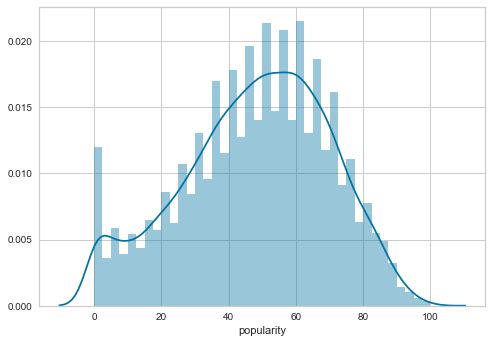

In [1104]:
# popularity of the artist is between 0 and 100 
# it is calculated from the popularity of all the artist’s tracks
sns.distplot(df_art.popularity);

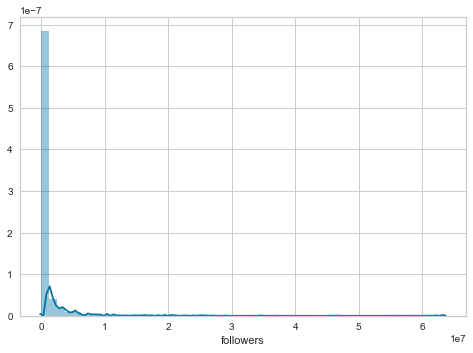

In [1105]:
sns.distplot(df_art.followers);

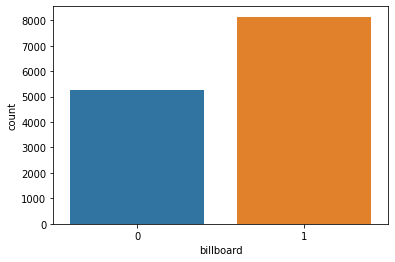

In [162]:
sns.countplot(df_art.billboard)

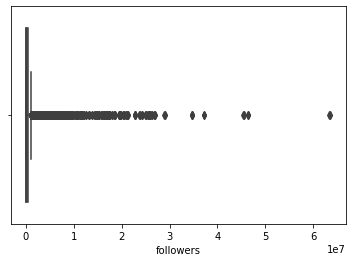

In [154]:
sns.boxplot(df_art.followers)

In [1112]:
df_art.shape

(13413, 7)

In [1116]:
(11404/13413)-1

-0.14978006411690148

In [1117]:
13413-11404

2009

outliers range: (-615013.5, 1040078.5)


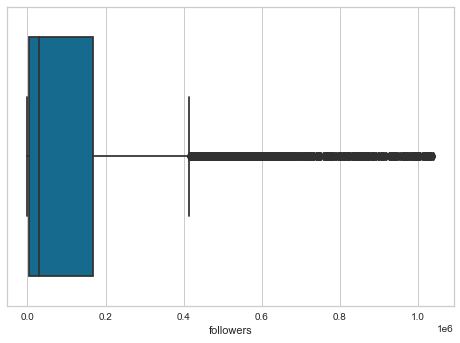

In [1108]:
outliers = remove_outlier(df_art, 'followers')
print('outliers range:' , outliers[1])
sns.boxplot(outliers[0].followers);

In [1111]:
outliers[0].shape

(11404, 7)

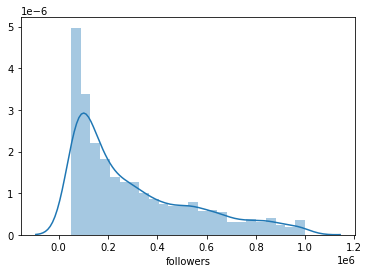

In [168]:
sns.distplot(df_art.query('followers>50000 & followers<1000000').followers)

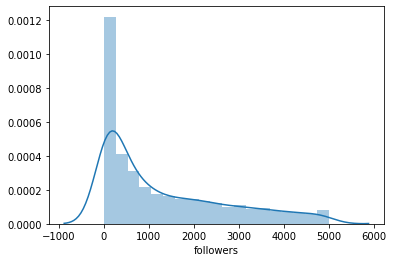

In [172]:
sns.distplot(df_art.query('followers<5000').followers)

## Defining the filters

There isn't much similarities that separates famous X non famous artists. 
Since there is a great number of outliers, non famous artists will be considered as follows:

> Cut by Number of followers: 
- max: the cut will be made higher fence 

> Sort by Popularity

> Sort by year (priority to recent decade)

In [5]:
df_art=df_art.drop(columns='billboard')

In [ ]:
artist_recommended(df_art)

In [12]:
df_art.head()

,artist,uri,followers,genres,popularity,decade,is_recommended
0,Garland Green,spotify:artist:3RY9bgHN1mRp5EX2wXF3NS,113,[],0,1960.0,1
1,Serge Gainsbourg,spotify:artist:01C9OoXDvCKkGcf735Tcfo,316662,"['chanson', 'french rock']",61,1960.0,1
2,Lord Melody,spotify:artist:5gyQ6QvPiTtPYLnifOEYld,2,[],0,1960.0,1
3,Celia Cruz,spotify:artist:2weA6hhVqTIN2gSn9PUB9U,336456,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",66,1960.0,1
4,P. Susheela,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,100166,"['deep indian pop', 'filmi', 'tamil worship']",42,1960.0,1


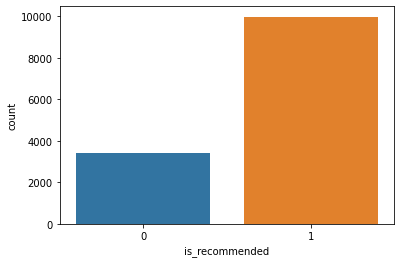

In [13]:
sns.countplot(df_art.is_recommended)

In [14]:
# Saving to a .csv
df_art.to_csv('data/final/artists.csv')

# Song recommendation

In [1122]:
#reading complete dataset
df= pd.read_csv('data/analysis/songs_sp_complete.csv')
df.head()

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,1,[],0.417,0.620,3.0,-7.727,1.0,0.0403,0.490,0.000000,0.0779,0.845,185.655,3.0
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0,"['chanson', 'french rock']",0.498,0.505,3.0,-12.475,1.0,0.0337,0.018,0.107000,0.1760,0.797,101.801,4.0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0,[],0.657,0.649,5.0,-13.392,1.0,0.0380,0.846,0.000004,0.1190,0.908,115.940,4.0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",0.590,0.545,7.0,-12.058,0.0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4.0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0,"['deep indian pop', 'filmi', 'tamil worship']",0.515,0.765,11.0,-3.515,0.0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4.0


## Checking for NaN

In [1123]:
df.shape

(43009, 18)

In [1124]:
df.isna().sum()

track                  0
artist                 0
tracks_uri             0
decade                 0
billboard              0
art_genres          3454
danceability           2
energy                 2
key                    2
loudness               2
mode                   2
speechiness            2
acousticness           2
instrumentalness       2
liveness               2
valence                2
tempo                  2
time_signature         2
dtype: int64

In [1125]:
df = df.drop(df.query('key == "NaN"').index).reset_index(drop=True)

In [1126]:
df.shape

(43007, 18)

In [641]:
df=df.fillna('not available')

In [642]:
df.isna().sum()

track               0
artist              0
tracks_uri          0
decade              0
billboard           0
art_genres          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

## Selecting Features

**> Features that won't be used to classify the tracks**
- `duration_ms`: (int) duration of the track in milliseconds.
- `key`:	(int) estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `mode`:	(int)	modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- `liveness:`	(float)	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 


**> Features that can be used to classify the tracks**

- `acousticness:`	(float)	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- `danceability:`	(float)	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy:`	(float)	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `instrumentalness:`	(float)	Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- `loudness:` (float)	loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- `speechiness:` (float)	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- `valence:`	(float)	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo:`	(float)	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- `time_signature`:	(int)	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [377]:
df.columns

Index(['track', 'artist', 'tracks_uri', 'decade', 'billboard', 'art_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [383]:
import seaborn as sns

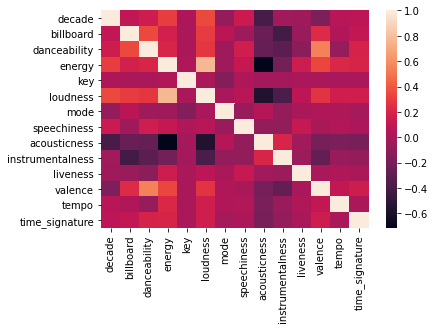

In [384]:
#First we'll use all numerical features that are related to the Audio Features,
## later on we can drop some features that bring similar info based on the performance 

sns.heatmap(df.corr())

In [1182]:
# Selecting all audio related features For the clusterization analysis: 
selected_feat=['danceability', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo']

In [1183]:
X = df[selected_feat]

In [1184]:
X.head()

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,0.417,-7.727,0.0403,0.490,0.000000,0.845,185.655
1,0.498,-12.475,0.0337,0.018,0.107000,0.797,101.801
2,0.657,-13.392,0.0380,0.846,0.000004,0.908,115.940
3,0.590,-12.058,0.1040,0.706,0.024600,0.967,105.592
4,0.515,-3.515,0.1240,0.857,0.000872,0.906,114.617


## Standardizing data

Since the clusterization will be made based on the distances

In [1185]:
from sklearn.preprocessing import StandardScaler

In [1186]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1187]:
scaler.transform(X)

array([[-0.70703105,  0.44502615, -0.3805068 , ..., -0.49984528,
         1.14131119,  2.27546986],
       [-0.25130756, -0.45302378, -0.45677918, ..., -0.14328831,
         0.9610514 , -0.60261199],
       [ 0.64326076, -0.62646771, -0.40708657, ..., -0.49983055,
         1.37790216, -0.11732567],
       ...,
       [-1.70287126, -2.63384007, -0.27881029, ...,  2.61253048,
        -1.80255653, -1.7962468 ],
       [-1.08961373,  0.74633061, -0.48567023, ..., -0.49594648,
        -0.60495554, -1.71778548],
       [-1.71412369,  0.37523247, -0.27187643, ..., -0.49984528,
        -1.86414529, -1.39216759]])

In [1188]:
X_std = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_std

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,-0.707031,0.445026,-0.380507,0.386991,-0.499845,1.141311,2.275470
1,-0.251308,-0.453024,-0.456779,-1.012228,-0.143288,0.961051,-0.602612
2,0.643261,-0.626468,-0.407087,1.442334,-0.499831,1.377902,-0.117326
3,0.266304,-0.374151,0.355637,1.027312,-0.417871,1.599471,-0.472495
4,-0.155662,1.241696,0.586766,1.474943,-0.496940,1.370391,-0.162734
...,...,...,...,...,...,...,...
43002,-1.595973,0.541678,-0.441756,-0.770922,-0.499845,-1.461190,-1.416228
43003,0.986460,0.946255,-0.448690,-1.001259,-0.499797,0.915986,-0.902213
43004,-1.702871,-2.633840,-0.278810,1.774353,2.612530,-1.802557,-1.796247
43005,-1.089614,0.746331,-0.485670,1.667632,-0.495946,-0.604956,-1.717785


## Hierarchical

###  Exploring number of Clusters - Dendrogram

In [1164]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [1175]:
X_std.shape

(43007, 8)

In [1189]:
##Getting a sample of 500 to run dendrogram
X_std_sample = X_std.sample(500, random_state = 42)
X_std_sample.head()

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo
27290,0.795169,0.456186,-0.491448,-0.084356,-0.498212,1.576939,0.945472
34156,-1.376551,-0.394390,-0.429044,-0.937820,2.046038,-1.880669,0.245326
41559,1.661606,0.512928,-0.069639,-0.632779,-0.499845,0.315120,-0.768802
28446,-0.082521,0.328892,-0.237207,-1.055449,-0.499818,1.081225,0.973067
31491,0.221295,0.587829,-0.386285,-0.906101,-0.499845,0.025954,0.960333


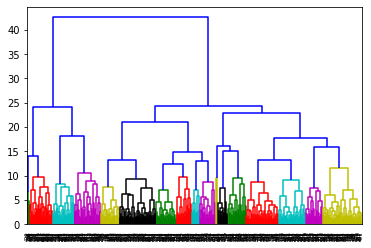

In [187]:
# 17 clusters
dendrogram = sch.dendrogram(sch.linkage(X_std_sample, method='ward'), color_threshold=12)

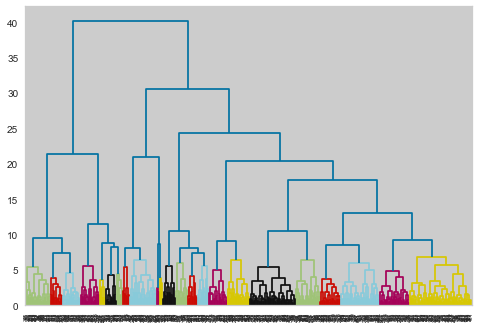

In [1191]:
# 30 clusters
dendrogram = sch.dendrogram(sch.linkage(X_std_sample, method='ward'), 
                            color_threshold=7,)

> `Conclusion`: Seems like the dendrogram is capturing well the distances between the songs

### Agglomerative Clustering 

In [1132]:
from sklearn.cluster import AgglomerativeClustering

In [1192]:
# First of all, since this model has a high cost, only the sample of 500 units will be fit

model = AgglomerativeClustering(n_clusters=30, linkage='ward')
model.fit(X_std_sample)
labels = model.labels_

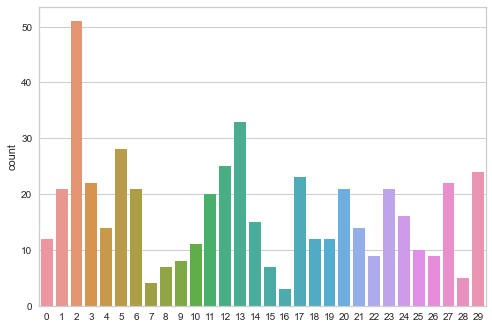

In [1193]:
# 30 Clusters: Some categories have more data than other, but apparently, the 15 clusters
## model seems to bring 
sns.countplot(labels);

### Visualizing - PCA

cumsum of explained variance ratio: [0.34526412 0.54108851]


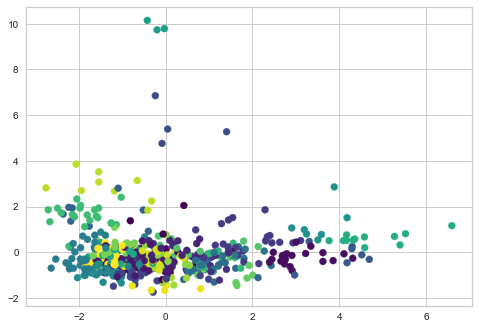

In [1194]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_std_sample)
pca.transform(X_std_sample)
print('cumsum of explained variance ratio:', pca.explained_variance_ratio_.cumsum())

plt.scatter(pca.transform(X_std_sample)[:,0], 
            pca.transform(X_std_sample)[:,1], 
            c = labels, cmap = 'viridis');

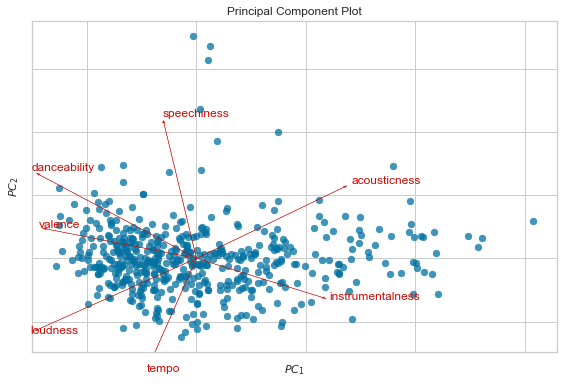

In [1195]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_std_sample)

visualizer.show();

### Sanity check - Comparing to real genres

In [1196]:
sample_lbl = df.loc[list(X_std_sample.index),['track','artist','art_genres','billboard']]
sample_lbl['label'] = labels

In [1200]:
# It got pretty much all right with label 13 for 17 and 30 clusters 
sample_lbl.query('label==4')

,track,artist,art_genres,billboard,label
24239,Mulholland Drive,Bryan Savage,['smooth jazz'],0,4
24318,Soul Sanction,Booker T. & the M.G.'s,NaN,0,4
21476,Le Parc,Tangerine Dream,"['ambient', 'art rock', 'berlin school', 'krau...",0,4
7402,Abba Zaba,Captain Beefheart & His Magic Band,NaN,0,4
33016,Marubari (Javali),E. Gayathri,"['carnatic', 'carnatic instrumental', 'indian ...",0,4
11355,Lucky Man,Starbuck,"['soft rock', 'yacht rock']",1,4
40883,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",1,4
27661,When They Ring The Golden Bells,Craig Duncan,"['instrumental bluegrass', 'irish dance', 'str...",0,4
20857,"Always with Me, Always with You",Joe Satriani,"['album rock', 'hard rock', 'instrumental rock...",0,4
24006,St. Anne's Reel,Scott Vestal,"['banjo', 'bluegrass', 'instrumental bluegrass...",0,4


In [1202]:
# Label 3 for 17 and 30 clusters seems to be quite right, but still mixes up a little bit. 

sample_lbl.query('label==22')

,track,artist,art_genres,billboard,label
34156,In The Summer,Terry Riley,"['american contemporary classical', 'avant-gar...",0,22
38146,Rottenatomy,Gorguts,"['brutal death metal', 'canadian metal', 'deat...",0,22
2191,Midnight Cowboy,Ferrante & Teicher,NaN,1,22
18979,Hero Without Honor,Vinnie Moore,"['instrumental rock', 'neo classical metal', '...",0,22
22267,Altitudes,Jason Becker,"['instrumental rock', 'neo classical metal', '...",0,22
29573,Cafo,Animals As Leaders,"['djent', 'instrumental rock', 'jazz metal', '...",0,22
13196,Still Life - 2005 Digital Remaster,Van Der Graaf Generator,"['art rock', 'canterbury scene', 'experimental...",0,22
18879,Tunnel Chase,Brad Fiedel,"['classic soundtrack', 'scorecore', 'soundtrack']",0,22
40148,Devouring Entities Devour,Winterwolf,['finnish death metal'],0,22


> Conclusions: 
- Seems like some features bring almost the same information, such as:
    - `energy` & `loudness`
    - `valence` & `danceability`
- There are important features that aren't receiving the right emphasis to the analysis as they should 
- Following with 30 clusters: 'WARD' Metric brought better results than the complete

## KMeans

### Exploring num of Clusters

In [650]:
from sklearn.cluster import KMeans

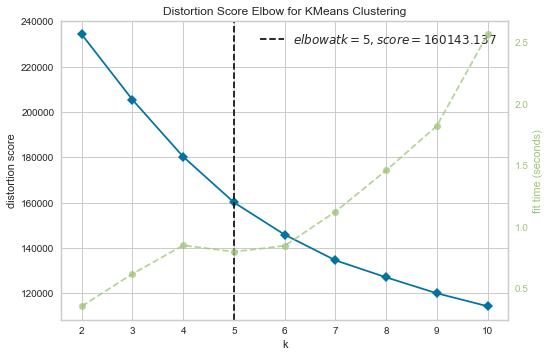

In [1203]:
# the elbow method

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model)

visualizer.fit(X_std)  
visualizer.show();     

### Clustering

In [1204]:
# testing with 10 clusters
kmeans = KMeans(10)
kmeans.fit(X_std)
kmeans.predict(X_std)
labels = list(kmeans.labels_)

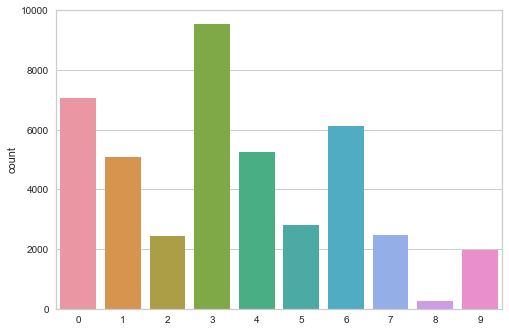

In [1205]:
sns.countplot(labels)

In [1206]:
kmeans = KMeans(30)
kmeans.fit(X_std)
kmeans.predict(X_std)
labels = list(kmeans.labels_)

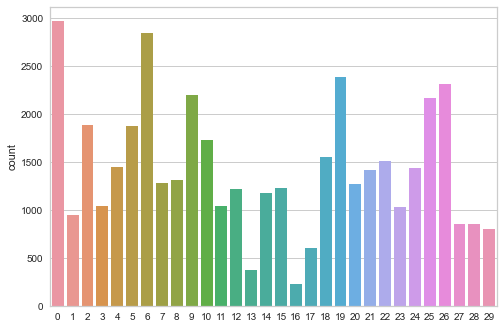

In [652]:
sns.countplot(labels)

### Visualizing - PCA

In [1207]:
# for 30 clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(8)
pca.fit(X_std)
pca.transform(X_std)
print('cumsum of explained variance ratio:', pca.explained_variance_ratio_.cumsum())

plt.scatter(pca.transform(X_std)[:,0], 
            pca.transform(X_std)[:,1], 
            c = labels, cmap = 'viridis');

ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'

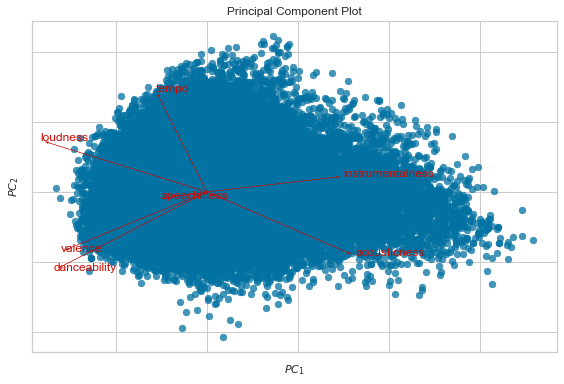

In [1208]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_std)

visualizer.show();

### Sanity check 

In [1209]:
sample_lbl = df.copy()
sample_lbl['label'] = labels

In [1210]:
sample_lbl.query('label==4')[['track','artist','art_genres','billboard']]

,track,artist,art_genres,billboard
17,Alfômega - Remastered 2006,Caetano Veloso,"['bossa nova', 'mpb', 'samba de roda']",0
38,Españolito,Joan Manuel Serrat,"['cantautor', 'nova canco', 'nueva cancion', '...",0
127,Nothing But Heartaches,The Supremes,"['adult standards', 'brill building pop', 'cla...",1
318,How Could I Be Such A Fool,Frank Zappa,"['album rock', 'art rock', 'classic rock', 'ex...",0
334,Mis Blues,Krokodil,['krautrock'],0
...,...,...,...,...
42920,Finira Bene,Ermal Meta,"['italian arena pop', 'italian pop']",1
42923,16 Marzo,Achille Lauro,"['italian alternative', 'italian hip hop', 'it...",1
42929,In Your Eyes (Feat. Alida),Robin Schulz,"['dance pop', 'deep euro house', 'deep house',...",1
42976,Yuve Yuve Yu,The Hu,['trap pesado'],1


In [1211]:
sample_lbl.query('label==18')[['track','artist','art_genres','billboard']]

,track,artist,art_genres,billboard
140,Amore mio aiutami - Version 4,Piero Piccioni,"['classic soundtrack', 'lounge', 'vintage ital...",0
212,Dirty Dishes,Jerry Goldsmith,"['classic soundtrack', 'scorecore', 'soundtrac...",0
213,Western générique - Version Live,Royal Philharmonic Orchestra,['orchestra'],0
267,Bataille de Zaccar,André Hossein,"['french soundtrack', 'oriental classical']",0
274,All I Have To Do Is Take A Bite Of Your Apple?,Jerry Goldsmith,"['classic soundtrack', 'scorecore', 'soundtrac...",0
...,...,...,...,...
40896,The Graduate,Soundtrack,[],1
41097,Miami Vice Theme,Jan Hammer,['jazz fusion'],1
42436,Cello Blue,David Darling,['bow pop'],1
42457,We Are Sent Here By History,Shabaka,['british jazz'],1


In [1212]:
sample_lbl.query('billboard ==1 & label==10')[['track','artist','art_genres','billboard']]

,track,artist,art_genres,billboard
20,I'm Here To Get My Baby Out Of Jail,The Everly Brothers,"['adult standards', 'brill building pop', 'bub...",1
115,You Mean The World To Me,David Houston,['nashville sound'],1
183,Heart In Hand,Brenda Lee,"['adult standards', 'brill building pop', 'eas...",1
223,Tears And Roses,Al Martino,"['adult standards', 'brill building pop', 'eas...",1
294,My Lover's Prayer,Otis Redding,"['classic soul', 'funk', 'memphis soul', 'soul...",1
...,...,...,...,...
42571,I Saw Three Ships,Nat King Cole,"['adult standards', 'lounge', 'vocal jazz']",1
42583,Christmas Classics,Bing Crosby,"['adult standards', 'easy listening', 'lounge']",1
42646,Dehors L'hiver,Ian Kelly,"['indie quebecois', 'pop quebecois']",1
42899,A Vava Inouva,Idir,['kabyle'],1


## Some Insights

> Agglomerative Hierarchiqual Clustering:
- Seems like the dendrogram is capturing well the distances between the songs
- Seems like some features bring almost the same information, such as:
    - `energy` & `loudness`
    - `speechness` & `liveness`
- There are important features that aren't receiving the right emphasis to the analysis as they should 

> KMeans Clustering: 
- Through the sanity check analysis, with these features, seems like even 20 clusters are too few to classify all songs
- Features selection has to be made more carefully and with different degrees / weights


### Chosen Model : AGG

In [ ]:
# Aglomerative 
# .fit em um sample estratificado(?)
# .predict no ds inteiro

In [ ]:
model = AgglomerativeClustering(n_clusters=30, linkage='ward')
model.fit(X_std)
labels = model.labels_

In [674]:
songs_final = df.copy()
songs_final['cluster'] = labels
songs_final.head()

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,1,[],0.417,0.620,3.0,-7.727,1.0,0.0403,0.490,0.000000,0.0779,0.845,185.655,3.0,12
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0,"['chanson', 'french rock']",0.498,0.505,3.0,-12.475,1.0,0.0337,0.018,0.107000,0.1760,0.797,101.801,4.0,7
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0,[],0.657,0.649,5.0,-13.392,1.0,0.0380,0.846,0.000004,0.1190,0.908,115.940,4.0,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",0.590,0.545,7.0,-12.058,0.0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4.0,22
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0,"['deep indian pop', 'filmi', 'tamil worship']",0.515,0.765,11.0,-3.515,0.0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4.0,22


In [675]:
songs_final.to_csv('data/final/songs_teste.csv', index=False)

In [40]:
songs_final.to_csv('data/final/songs.csv', index=False)

In [ ]:
# It takes too long, another model would be good

# Pipeline

In [699]:
df= pd.read_csv('data/analysis/songs_sp_complete.csv')

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from sklearn.cluster import KMeans

In [702]:
df.head(3)

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,1,[],0.417,0.620,3.0,-7.727,1.0,0.0403,0.490,0.000000,0.0779,0.845,185.655,3.0
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0,"['chanson', 'french rock']",0.498,0.505,3.0,-12.475,1.0,0.0337,0.018,0.107000,0.1760,0.797,101.801,4.0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0,[],0.657,0.649,5.0,-13.392,1.0,0.0380,0.846,0.000004,0.1190,0.908,115.940,4.0


In [703]:
df.shape

(43009, 18)

In [704]:
df.isna().sum()

track                  0
artist                 0
tracks_uri             0
decade                 0
billboard              0
art_genres          3454
danceability           2
energy                 2
key                    2
loudness               2
mode                   2
speechiness            2
acousticness           2
instrumentalness       2
liveness               2
valence                2
tempo                  2
time_signature         2
dtype: int64

In [701]:
pipeline = Pipeline(steps=[('features_selection', AudioFeatures()),
                           ('missing', SimpleImputer(fill_value='[]')),
                           ('preprocessing', StandardScaler()),
                           ('feature_clusterization', KMeans(30))])

In [705]:
pipeline.fit(df)

Pipeline(memory=None,
         steps=[('features_selection',
                 <__main__.AudioFeatures object at 0x14ca90610>),
                ('missing',
                 SimpleImputer(add_indicator=False, copy=True, fill_value='[]',
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('preprocessing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('feature_clusterization',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=30, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
pipeline

In [712]:
pipeline.transform(df)

array([[3.76936336, 5.15042597, 4.24739794, ..., 4.7545603 , 4.93624529,
        5.49547694],
       [1.94247804, 3.60210704, 2.00104027, ..., 3.02629928, 3.8233182 ,
        3.81886075],
       [1.55603792, 3.6836638 , 3.19077489, ..., 3.73178484, 4.96205333,
        4.09555122],
       ...,
       [6.314581  , 5.42099976, 6.35415403, ..., 6.31396274, 6.08762129,
        7.63091608],
       [3.15399723, 3.0401941 , 3.07185032, ..., 4.68510515, 4.59195979,
        4.7207005 ],
       [4.24991999, 3.59254054, 2.77703583, ..., 4.67273917, 3.77295373,
        4.8276547 ]])

In [707]:
pipeline.predict(df)

array([10,  3,  0, ..., 23, 24,  2], dtype=int32)

In [718]:
pipeline.named_steps['missing']
pipeline.steps[3]

('feature_clusterization',
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0))

In [709]:
df['cluster'] = pipeline.predict(df)
df.head()

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,1,[],0.417,0.620,3.0,-7.727,1.0,0.0403,0.490,0.000000,0.0779,0.845,185.655,3.0,10
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0,"['chanson', 'french rock']",0.498,0.505,3.0,-12.475,1.0,0.0337,0.018,0.107000,0.1760,0.797,101.801,4.0,3
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0,[],0.657,0.649,5.0,-13.392,1.0,0.0380,0.846,0.000004,0.1190,0.908,115.940,4.0,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",0.590,0.545,7.0,-12.058,0.0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4.0,15
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0,"['deep indian pop', 'filmi', 'tamil worship']",0.515,0.765,11.0,-3.515,0.0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4.0,15


In [710]:
df.isna().sum().sum()

3478

In [720]:
df.to_csv('data/final/pipeline.csv')

# Recommender System Model

In [214]:
from scipy.spatial.distance import pdist, squareform

> `database`:
- import
- preprocess

> `input`: 
- música
- gênero

> `processamento`:
- buscar na base de dados de música atual, encontrar artista, separar
- filtrar DB por target (recomendável)
- filtrar por cluster POR FEATURES
- análise word2vec gêneros
- análise word2vec para a música do input
- calcular dist cosine

- standardizar dados
- incluir no sistema de recomendação
- filtrar os 10 mais semelhantes

> `output`:
- retornar página com top 5 músicas e artistas
- links para ouvir a música

## Databases

### Import

In [677]:
# retrieve datasets
songs = pd.read_csv('data/final/songs.csv')
artists = pd.read_csv('data/final/artists.csv')

In [726]:
songs = pd.read_csv('data/final/pipeline.csv').drop(columns='Unnamed: 0')

In [727]:
songs.head()

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,1,[],0.417,0.620,3.0,-7.727,1.0,0.0403,0.490,0.000000,0.0779,0.845,185.655,3.0,10
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0,"['chanson', 'french rock']",0.498,0.505,3.0,-12.475,1.0,0.0337,0.018,0.107000,0.1760,0.797,101.801,4.0,3
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0,[],0.657,0.649,5.0,-13.392,1.0,0.0380,0.846,0.000004,0.1190,0.908,115.940,4.0,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0,"['cha-cha-cha', 'cuban rumba', 'latin', 'latin...",0.590,0.545,7.0,-12.058,0.0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4.0,15
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0,"['deep indian pop', 'filmi', 'tamil worship']",0.515,0.765,11.0,-3.515,0.0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4.0,15


## Input & Validation

### Speech recognition

In [860]:
user_input=check_input(song_input=get_audio('title'), artist_input=get_audio('artist'))

Tell us the title of a song you like :)
Listening... (you've got 4 seconds)
Processing...
Tell us the artist who sings that song
Listening... (you've got 4 seconds)
Processing...
You chose "be humble" by Kendrick Lamar, right? (y/n)y


### Written song

In [886]:
user_input=check_input(song_input=get_text('title'), artist_input=get_text('artist'))

Tell us the title of a song you like :)humble
Tell us the artist who sings that songkendrick lamar
You chose "Humble." by Kendrick Lamar, right? (y/n)y


## Processing

In [994]:
# processing the input and saving to dabase new information
process = target_process(user_input)
target_song = process[0]
target_cluster = process[1]

found in the database


In [981]:
# now it's time to filter by the 10 nearest songs and artists
cluster_songs = get_recomm_songs(target_cluster)
recomm_songs = cluster_songs.copy().reset_index(drop=True)

# defining X and y 
X = recomm_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']]
y = target_song[list(X_std.columns)]

#Standardizing
X_std = pd.DataFrame(scaler.transform(X), columns=X.columns)
y_std = pd.DataFrame(scaler.transform(y), columns=y.columns)

## Ball Tree

In [915]:
from sklearn.neighbors import BallTree

In [1010]:
#Calculating the distance between the target song to all the rest of the same cluster
tree = BallTree(X_std, metric= 'euclidean')    
dist, ind = tree.query(y, k=10)            

In [1094]:
# Tuning by some other parameters and showing the final results
final_feat = ['track', 'artist']
recommendation = recomm_songs.loc[list(ind[0])].query('billboard ==0').sort_values(by=['valence','speechiness',])
recommendation

,track,artist,tracks_uri,decade,billboard,art_genres,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,is_recommended,Topic
131,Le bonheur,L'Entourloop,spotify:track:50x8tChpDOmtHIX3mdUqWk,2010.0,0.0,['future funk'],0.748,0.469,4.0,-9.619,...,0.0586,0.002250,0.08940,0.0660,0.191,140.024,4.0,21,1,8
196,The Penniless Optimist,The Electric Swing Circus,spotify:track:1VmReZno6HCogQfamIMNzs,2010.0,0.0,"['electro swing', 'nu jazz']",0.759,0.701,2.0,-8.836,...,0.0421,0.074100,0.00785,0.1180,0.465,122.017,4.0,21,1,0
170,Fall,Swing Republic,spotify:track:36twTEaOCQ68AYe8DYKU4P,2010.0,0.0,"['electro swing', 'nu jazz']",0.783,0.660,2.0,-8.625,...,0.0465,0.148000,0.00000,0.0739,0.475,122.979,4.0,21,1,0
58,Metal Reggae,Adão Negro,spotify:track:46wyeXuUsoaQ8jeVRWRLzD,2000.0,0.0,"['axe', 'brazilian reggae']",0.831,0.429,0.0,-8.433,...,0.0465,0.029600,0.00000,0.2260,0.485,130.568,4.0,21,1,2
161,Fever - Pagany Jazzy Mix,Jazz Juice,spotify:track:0tkZSSlga53MxBstm3O9Js,2010.0,0.0,['nu jazz'],0.792,0.682,0.0,-8.686,...,0.0468,0.000972,0.17000,0.0757,0.542,125.001,4.0,21,1,0
153,We No Speak Americano,Yolanda Be Cool,spotify:track:3SmzFvJKGjsNTnMu7TCvCF,2010.0,0.0,"['australian dance', 'australian house', 'bass...",0.860,0.595,3.0,-9.273,...,0.0648,0.046800,0.37200,0.0824,0.545,124.987,4.0,21,1,0


In [1091]:
def get_url (df, sp_ac = access_spotify()):

    url_list=[]
    for artist in df.artist:
        sp = sp_ac
        link = sp.search(q=f"artist:{artist}", limit=1, type='artist')['artists']['items'][0]['external_urls']['spotify']
        url_list.append(link)
    return url_list

# Deploy: Streamlit

In [1100]:
df = pd.read_csv('data/analysis/everynoise_genres.csv')
df

,genres
0,latin shoegaze
1,norwegian psychedelic
2,progressive power metal
3,indonesian indie rock
4,operatic pop
...,...
4345,experimental rock
4346,drone
4347,rock progresivo mexicano
4348,ambient techno


In [1098]:
df.to_csv('data//analysis/everynoise_genres.csv', index=False)

# Classes & Functions

## Pipeline

In [617]:
class AudioFeatures():
    
    def __init__(self):     
        pass
    
    def fit(self, X, y=None):
        '''
        `.fit()` method needs to return the object itself
        '''
        return self
    
    def transform(self, X):
        '''
        `.transform()` method needs to return a transformed data like X
        '''
        features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'] 
        
        X = X[features]
        
        return X
        

## Clean Artist's names 

In [17]:
def clean_name(df:pd.DataFrame, column_name:str)-> pd.DataFrame:
    '''
    This function cleans the artist's name column of a dataframe and 
    returns the df with the respective column containing only the main name
    '''
    
    import re
    
    df = df.reset_index(drop=True)

    for i in range(df.shape[0]):
        string = df.loc[i,'artist']
        pattern ='(?:Feat(?:\. |uring )|, |\/|\+|&| [Xx] | \(|\)| [Ww]ith | And | y )'
        artists = re.split(pattern, string)
        df.loc[i, 'artist'] = artists[0]
    return df

## Spotify API functions

In [ ]:
def get_sptf_link(track_uri):
    'external_urls'

In [827]:
def access_spotify():
    '''
    this function initializes spotify access 
    '''
    import spotipy
    import spotipy.util as util
    from spotipy.oauth2 import SpotifyClientCredentials
    
    # Credentials
    client_id= '1337a27731b840f98acd0c79f0d011f3'
    client_secret = '98f2df2fdde44f40ad768a8142b20074'
    response_type = 'code'
    redirect_uri = 'https://aceworld.com.br/'
    state= 'https%3A%2F%2Faceworld.com.br%2F'
    scope = 'playlist-read-private scope'
    username = 'dnekdiptrsu4rr1heu145y07j'
    playlist = 'spotify:playlist:2QDyvRV0Ct7bGg3AREkL6P'

    #Accessing with token
    scope = 'user-library-read playlist-read-private'
    try:
        token = util.prompt_for_user_token(username, scope,client_id=client_id, 
                                           client_secret=client_secret, 
                                           redirect_uri=redirect_uri)
        sp=spotipy.Spotify(auth= token)
    except:
        print('Token is not accesible for ' + username)

    return sp

In [828]:
def get_artist_stats(df=False, artist_name: str = 'None', billboard_col: bool = False,
                     spotify_access=access_spotify())-> pd.DataFrame:
    
    '''
    This function receives a dataframe containing a column with artists' names ('artist')
    or a single artist name and the spotify authenticated access to make the requests, 
    and returns a new dataframe, containing the spotify attributes for that artist:
        - artist spotify id (uri)
        - number of followers
        - genres
        - popularity
    
    <parameters>
    df: a DataFrame or 'False' if the request will be for a single artist
    billboard_col: True if the input df already contains a target 
                    column named 'billboard'.
    spotify_access: function that accesses spotify authorization token, 
                    by default: access_spotify()
    '''
    import time
    
    sp = spotify_access
    artists=[]
    uris = []
    followers = []
    genres =[]
    popularities = []
    error_artists = []
    billboard_targets = []
    
    if df == False and artist_name != 'None':
        artist = artist_name
        q = f'artist:{artist}'
        try:
            results = sp.search(q=q, limit=1, type='artist')['artists']['items'][0]
        except:
            try:
                sp=access_spotify()
                results = sp.search(q=q, limit=1, type='artist')['artists']['items'][0]
            except:
                pass
            
        df_final = pd.DataFrame({'artist': artist,
                     'uri': results['uri'],
                     'followers': results['followers']['total'],
                     'genres': [results['genres']],
                     'popularity': results['popularity'],
                     'billboard': ''})
        
    else: 
        for i in range(df.index[0], df.shape[0]):
            artist = df.loc[i, 'artist']
            q = f'artist:{artist}'

            try:
                results = sp.search(q=q, limit=1, type='artist')['artists']['items'][0]
                print (artist)
            except:
                try:
                    print ('refreshing token')
                    sp=access_spotify()
                    results = sp.search(q=q, limit=1, type='artist')['artists']['items'][0]
                except:
                    print ('error:', artist)
                    pass

            artists.append(artist)
            uris.append(results['uri'])
            followers.append(results['followers']['total'])
            genres.append(results['genres'])
            popularities.append(results['popularity'])
            # if input df contains 'billboard' column
            if billboard_col == True:
                billboard_targets.append(df.loc[i, 'billboard'])
            else:
                pass

            df_2 = pd.DataFrame({'artist': artists,
                                 'uri': uris,
                                 'followers': followers,
                                 'genres': genres,
                                 'popularity': popularities,
                                 'billboard': billboard_targets})
            # saving a version to .csv
            df_2.to_csv('data/processed/artists_stats_process.csv', index=False)

    # saving final version to .csv    
        df_final = df_2
        df_final.to_csv('data/processed/artists_stats_final.csv', index=False)

    return df_final

In [885]:
def get_audio_features(df=False, track_title:str='None', artist_name:str='None',
                      spotify_access=access_spotify())-> pd.DataFrame:
    '''
    This function receives a dataframe containing tracks' Spotify uris 
    or a single track title and
    and returns a dataframe with the track's audio features.
    
    <parameters>
    df: a DataFrame or 'False' if the request will be made for a single track
    spotify_access: function that accesses spotify authorization token, 
                    by default: access_spotify()
    '''
    feat_df = pd.DataFrame()
    pop=[]
    art_genres=[]
    cluster=[]
    
    if df == False :
        q= f'track:{track_title} artist:{artist_name}'
        sp=access_spotify()
        results = sp.search(q=q, limit=1, type='track')
        track_title =results['tracks']['items'][0]['name']
        tracks_uri = results['tracks']['items'][0]['uri']
        artist_name = results['tracks']['items'][0]['artists'][0]['name']
        artist_uri = results['tracks']['items'][0]['artists'][0]['uri'] 
        
        audio_feat = sp.audio_features(track_uri)
        art_genres = sp.artist(artist_uri)['genres']
        cluster= ''
        
        new_df = pd.concat([pd.DataFrame([[
            track_title, artist_name,tracks_uri, artist_uri, art_genres,cluster]], 
            columns=['track','artist','tracks_uri','artist_uri','art_genres', 'cluster']), 
                            pd.DataFrame(audio_feat)], axis=1)
    else:
        saved_uris = list(df.tracks_uri)

        for uri in saved_uris:
            feat_df = feat_df.append(pd.DataFrame(sp.audio_features(uri)))
            track_req=sp.track(uri)
            pop.append(track_req['popularity'])
            art_genres.append(sp.artist(track_req['artists'][0]['uri'])['genres'])
            cluster.append('')

        new_df = pd.concat([df, feat_df.reset_index(drop=True), 
                            pd.DataFrame(pop, columns=['popularity']),
                            pd.DataFrame(art_genres, columns=['art_genres']),
                            pd.DataFrame(cluster, columns=['cluster'])], axis=1)
    
    
    new_df = new_df [['track', 'artist', 'tracks_uri', 'art_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster']]
    
    return new_df

## Billboard API functions

In [6]:
def get_billboard_charts_data(chart_types: list) -> pd.DataFrame:
    '''
    This function retrieves data from the given list of chart types:
        - song title
        - artist name
        - chart name
    > for more information about chart_types: access 'billboard.charts()'
    '''
    
    df=pd.DataFrame()
    title_list=[]
    artist_list=[]
    chart_name=[]

    for chart_type in chart_types:
        chart = billboard.ChartData(chart_type)
        for song in chart:
            title_list.append(song.title)
            artist_list.append(song.artist)
            chart_name.append(chart.name)

        df = pd.DataFrame({'title':title_list, 
                       'artist':artist_list, 
                       'chart':chart_name})
        df.to_csv('data/raw/billboard_artists_process.csv', index=False)
    
    df=df.drop_duplicates()
    df.to_csv('data/raw/billboard_artists.csv', index=False)
    
    return df

## Recommendation System Flow

In [748]:
# Adding new target based on number of followers:
def artist_recommended(df):
    df['is_recommended'] = df.followers.apply(lambda x: 0 if x > 400000 else 1)
    return df

In [271]:
def get_audio(audio_type:str)-> str:
    '''
    this function receives a speaked audio and transforms it into written text
    you must specify the type between: 'artist' or 'title'
    '''
    import speech_recognition as sr
    import time
    
    r = sr.Recognizer()
    sec = 4
    
    if audio_type == 'title':
        print(f'Tell us the title of a song you like :)')
    elif audio_type == 'artist':
        print(f'Tell us the artist who sings that song')
    else:
        raise ValueError ('audio_type must be "artist" or "title"')
    
    with sr.Microphone() as source:
        # read the audio data from the default microphone
        print(f"Listening... (you've got {sec} seconds)")
        try:
            audio_data = r.record(source, duration=sec)
        except:
            print(f"I didn't hear you, would you repeat please?")
            print(f"Listening... (you've got {sec} seconds)")
        # convert speech to text
        print("Processing...")
        user_input = r.recognize_google(audio_data)
        
        return user_input

In [270]:
def get_text(text_type:str)-> str:
    '''
    this function receives a written text
    you must specify the type between: 'artist' or 'title'
    '''
    if text_type == 'title':
        user_input = str(input(f'Tell us the title of a song you like :)'))
    elif text_type == 'artist':
        user_input = str(input(f'Tell us the artist who sings that song'))
    else:
        raise ValueError ('audio_type must be "artist" or "title"')    

    return user_input

In [365]:
def check_input(song_input: str, artist_input: str)-> list:
    '''
    this function receives an input and confirms if the title was well captured.
    returns a list containing:
        - in position [0]: string (the song title)
        - in position [1]: string (the artist name)
        - in position [2]: bool (0 if not found in database, 1 if found in database)
    '''
    import textdistance
    import time
    n=4

    # assuring if it got the song correctly:     
    try:
        song_lev_dists = songs.track.apply(lambda x:textdistance.levenshtein.normalized_similarity(
                           song_input, x)).sort_values(ascending=False).head(n)
        song_recomm_index = list(song_lev_dists.index)
        song_recomm = songs.loc[song_recomm_index,['track', 'artist']]
        song_recomm['song_dist']=song_lev_dists
        song_recomm['art_dist']= song_recomm.artist.apply(lambda x:textdistance.levenshtein.normalized_similarity(
                           artist_input, x))
        final_recomm = song_recomm.sort_values(by=['song_dist', 'art_dist'], ascending=False)
        final_recomm = final_recomm.query('art_dist > 0.5 and song_dist > 0.5').head(1)
        final_recomm_song = songs.loc[final_recomm.index[0],'track']
        final_recomm_artist = songs.loc[final_recomm.index[0],'artist']    

        # assuring the artist is the same
        if song_lev_dists[final_recomm.index[0]] >= 0.6:
            validate = str(input(f'You chose "{final_recomm_song}" by {final_recomm_artist}, right? (y/n)'))

        elif song_lev_dists[final_recomm.index[0]] < 0.6 and song_lev_dists[final_recomm.index[0]] >= 0.4:
            validate = str(input(f'Did you mean: "{final_recomm_song}" by {final_recomm_artist}? (y/n)'))

        if validate in ['y', 'yes', 'Y', 'Yes', 'YES','sim','Sim','S', 's','SIM']:
            return [final_recomm_song, final_recomm_artist, 1]
        else:
            ## Look for 
            return [song_input, artist_input, 0]
    except:
        validate = str(input(f'You chose "{song_input}" by {artist_input}, right? (y/n)'))
        if validate in ['y', 'yes', 'Y', 'Yes', 'YES','sim','Sim','S', 's','SIM']:
            return [song_input, artist_input, 0]
        else:
            print("We're sorry, we couldn't find this song :(")

In [987]:
# look for the song in the songs database

def target_process(user_input: list)-> list:
    '''
    This function processes the target song, and clusterizes it given its features
    returns a list containing:
        - target_song
        - target_cluster
    It also saves to the database new songs/artists.
    '''
    
    songs = pd.read_csv('data/final/songs.csv')
    artists = pd.read_csv('data/final/artists.csv')

    if user_input[2] == 1:
        target_song = songs.query(f'track == "{user_input[0]}"')
        target_index = target_song.index[0]
        target_cluster =  songs.loc[target_index, 'cluster']
        target_artist = songs.loc[target_index, 'artist']
        print('found in the database')
    else:
        print('not found in the database, retrieving infos from spotify')

        # look for song in spotify
        target_song = get_audio_features(track_title=user_input[0], artist_name=user_input[1])
        pipeline.transform(target_song)
        target_song['cluster'] = pipeline.predict(target_song)

        # adding new song to songs database
        if target_song.track[0] not in list(songs.track):
            songs = pd.concat([songs, target_song], axis=0).reset_index(drop=True)
            songs.to_csv('data/final/songs.csv', index=False)

        #ADDING new artist to artist database_
        target_artist = target_song.artist[0]
        new_art = artist_recommended(get_artist_stats(artist_name=target_artist))
        if new_art.artist[0] not in list(artists.artist):
            artists = pd.concat([artists, new_art]).reset_index(drop=True)
            artists.to_csv('data/final/artists.csv', index=False)        
        print("we're all set")
    
    return [target_song, target_cluster]


In [996]:
def get_recomm_songs (target_cluster: int) -> pd.DataFrame:
    '''
    this function receives the target cluster label, filters songs dataset by 
    cluster and target artists (non famous artists)
    '''
    
    # filter song dataset by target artists
    recomm_artists = artists.query('is_recommended == 1').loc[:,['artist', 'followers', 'popularity']]


    # filter songs dataset by cluster
    cluster_songs = songs.loc[songs.cluster == target_cluster]

    # filter songs by artist (is_recommended or not)
    cluster_songs['is_recommended'] = cluster_songs.artist.apply(lambda x: 1 if x in list(recomm_artists.artist) else 0)
    cluster_songs = cluster_songs.loc[cluster_songs.is_recommended == 1]
    cluster_songs = cluster_songs.loc[cluster_songs.decade > 1990]

    cluster_songs = cluster_songs.loc[cluster_songs.art_genres != "[]",:]
    
    return cluster_songs

## Other

In [1107]:
def remove_outlier(df_in:pd.DataFrame, col_name:str):
    '''
    this function accepts a dataframe, removes outliers, 
    returns a list, containing:
        - [0] new dataframe filtering outliers
        - [1] tuple, containing low, high fences of outliers
    '''
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return [df_out, (fence_low, fence_high)]

# Sources and References

## Databases & APIs

> `Spotify`
- Official Documentation: https://developer.spotify.com/documentation/web-api/reference/
- spotipy: Python module for Spotify's API (https://pypi.org/project/spotipy/)

> `Billboard`
- billboard.py: Python module for Billboard's API (https://pypi.org/project/billboard.py/) 
- github: (https://github.com/guoguo12/billboard-charts)

> `Kaggle`
- hit predictor: https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset

> `Genres`
- Every noise at once: http://everynoise.com/#otherthings

> `Chartmetric`
- https://blog.chartmetric.com/genre-specific-music-recommendations/

## Requirements

In [ ]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name
        
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("{}=={}".format(*r))